# Beta Bank Customers

## Introduction

Beta Bank bankers found out that the customers are leaving slowly by slowly every month. But, they realized that its cheaper to save the existing customers rather than to attract new ones. We need to predict whether a customer will leave the bank soon. So, in this project, using the data on clients' past behavior and termination of contracts, we will build a model with the maximum possible F1 score of at least 0.59. Lastly, check the F1 for the test set, and measure the AUC-ROC metric and compare it with the F1.

## Data Overview

In [ ]:
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score

In [ ]:
# Load the datasets
churn = pd.read_csv('churn.csv')

# Display the first few rows of the dataset
display(churn.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Data preprocessing

In [4]:
# Dislay the column names of the dataset
column_names = churn.columns.tolist()
display(column_names)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
# Renaming columns for better readability
churn = churn.rename(
      columns=
    {
        'RowNumber': 'row_number',
        'CustomerId': 'customer_id',
        'Surname': 'surname',
        'CreditScore': 'credit_score',
        'Geography': 'geography',
        'Gender': 'gender',
        'Age': 'age',
        'Tenure': 'tenure',
        'Balance': 'balance',
        'NumOfProducts': 'num_of_products',
        'HasCrCard': 'has_cr_card',
        'IsActiveMember': 'is_active_member',
        'EstimatedSalary': 'estimated_salary',
        'Exited': 'exited'
    })

Using the code above, I have renamed the name of the columns in this data to the ones which does not hve capital alphabets and two words are connected by '_'.

In [ ]:
# Display the shape of the dataset
n_rows, n_cols = churn.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 10000 rows and 14 columns


In [ ]:
# Display informative summary of the datasets
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
# Display descriptive statistics of the datasets
churn.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Duplicates

In [9]:
# Check for duplicates in the dataset
duplicated_churn = churn[churn.duplicated()]
display(f"Number of duplicated data: {duplicated_churn.shape[0]}")

'Number of duplicated data: 0'

From this code, it is known that there are no duplicates in this data.

In [10]:
# Check for duplicates in specific columns of the dataset
customer_id_duplicates = churn[churn.duplicated(subset=['customer_id'])]
display(f"Number of duplicated Customer ID: {customer_id_duplicates.shape[0]}")

'Number of duplicated Customer ID: 0'

No, there are no duplicates in 'customer_id' column. 

### Missing Values

In [ ]:
# Display for missing values in the dataset
display(churn.isna().sum())

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

It is known that column 'tenue' have 900 missing data values.

In [ ]:
# Displaying the percentage of missing values in each column
churn.isnull().sum()/len(churn)

row_number          0.0000
customer_id         0.0000
surname             0.0000
credit_score        0.0000
geography           0.0000
gender              0.0000
age                 0.0000
tenure              0.0909
balance             0.0000
num_of_products     0.0000
has_cr_card         0.0000
is_active_member    0.0000
estimated_salary    0.0000
exited              0.0000
dtype: float64

In [ ]:
# Display the number of unique values in 'tenure' column
display(churn['tenure'].value_counts(dropna=False).head())

tenure
1.0    952
2.0    950
8.0    933
3.0    928
5.0    927
Name: count, dtype: int64

In [16]:
# Calculating the median to fill the missing values in 'tenure' column
tenure_median = churn['tenure'].median()
display(tenure_median)

5.0

In [17]:
# Filling the missing values in 'tenure' column using the median value
churn['tenure'] = churn['tenure'].fillna(tenure_median)

In [18]:
# Checking if there are any missing values
print(churn.isna().sum())

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64


As you mentioned that 900 missing values out of 10000 rows is almost 10% of the total data, its a lot. So I found the median value for the 'tenure' column and used 'fillna' function to fill in the gaps with the median value. 

## Data Analysis

In [19]:

filtered_data = churn[(churn['age'] >= 20) & (churn['age'] <= 30) & (churn['credit_score'] >= 500) & (churn['estimated_salary'] >= 100000)]
display(filtered_data.head(5))

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
13,14,15691483,Chin,549,France,Female,25,5.0,0.00,2,0,0,190857.79,0
25,26,15738191,Maclean,577,France,Male,25,3.0,0.00,2,0,1,124508.29,0
34,35,15732963,Clements,722,Spain,Female,29,9.0,0.00,2,1,1,142033.07,0
46,47,15602280,Martin,829,Germany,Female,27,9.0,112045.67,1,1,1,119708.21,1
61,62,15773469,Clark,687,Germany,Female,27,9.0,152328.88,2,0,0,126494.82,0


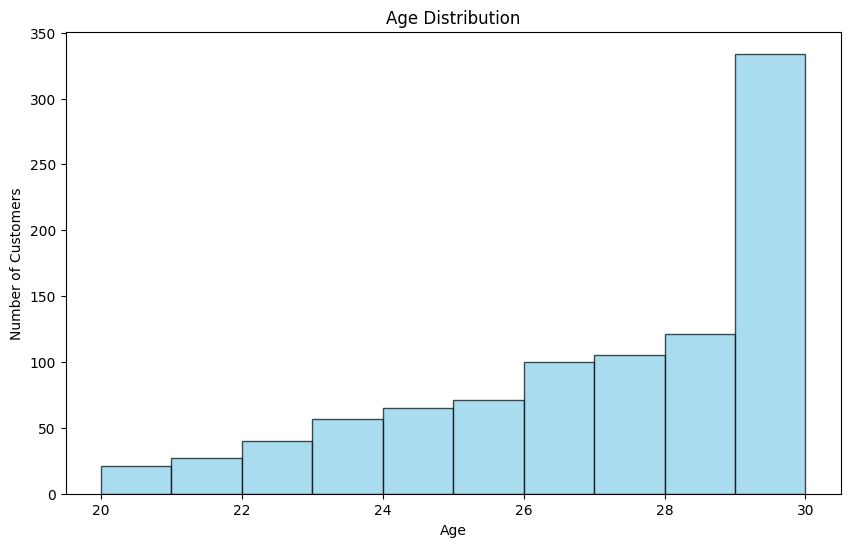

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['age'], 
         bins=10, 
         color='skyblue', 
         edgecolor='black', 
         alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

The graph above shows the distribution of the Bear Bank Customers who are 20 to 30 years old with credit score higher than 500 and salary more than 100000. It represents that among those most of the them are 29-30 years old. 

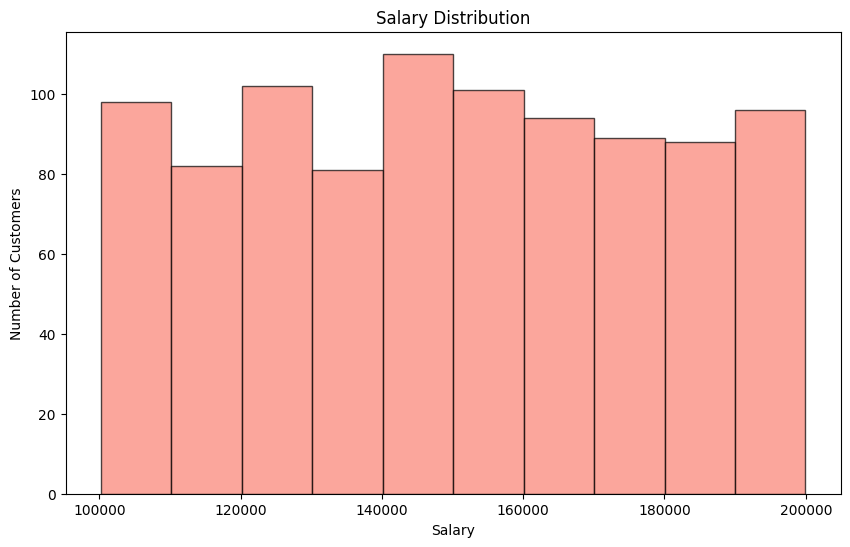

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['estimated_salary'], 
         bins=10, 
         color='salmon', 
         edgecolor='black', 
         alpha=0.7)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Customers')
plt.show()

The graph above shows the salary distribution of the Bear Bank Customers who are 20-30 years older, have salary higher than $100000, and credit score higher than 500. This graph seems like normally distributed and looks like there are more customers who have salaries higher than 150000 rather less than that. The graphs here represents that most of the younger customers are doing well as they have a good income and thus need a good and stable for it. 

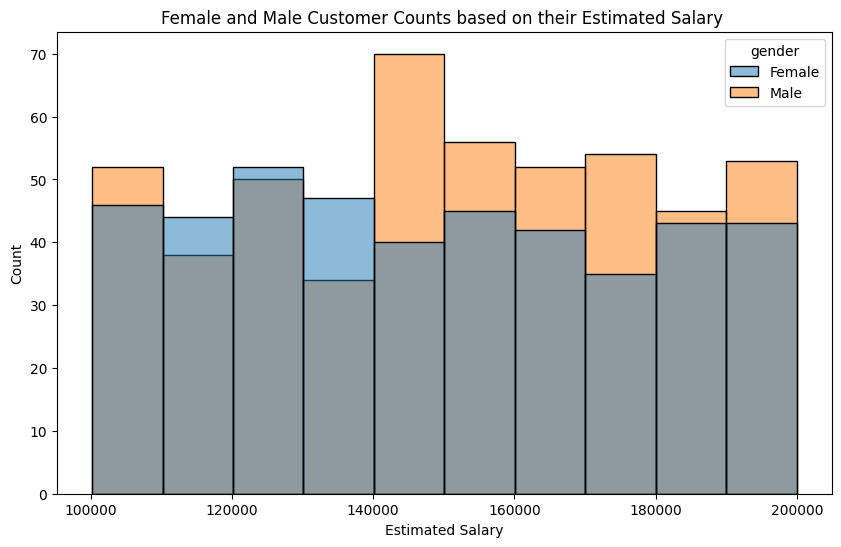

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data= filtered_data, 
             x='estimated_salary', 
             hue='gender', 
             bins=10)
plt.title('Female and Male Customer Counts based on their Estimated Salary ')
plt.xlabel('Estimated Salary')
plt.ylabel=('Number of Customers')
plt.show()

The graph above shows the distribution of the salaries of 20-30 year old customers who are earning higher than $100000, and a credit score higher than 500. From this graph, it can be seen that mostly in every estimated salary range, males are earning higher than females, except some. 

## Machine Learning

### Split the source data into a training set, a validation set, and a test set.

As it asks to split the source data into a training set, a validation set, and a test set - I split the source data into three parts: training, validation, and test. The sizes of validation set and test set are equal. and so divided the source data into 3:1:1 ratio.

In [24]:
churn.dtypes

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure              float64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

In [25]:
features = churn.drop(['exited'], axis=1)
print(features.shape)

target = churn['exited']
print(target.shape)

(10000, 13)
(10000,)


In [26]:
churn = churn.drop(['surname','customer_id','row_number'], axis=1)

In [27]:
churn = pd.get_dummies(churn, columns=['geography', 'gender'], drop_first=True)

Here I am using One-Hot Encoding for transforming categorical features into numerical features. 

In [28]:
churn_train, churn_temp = train_test_split(churn, test_size=0.40, random_state=7)

In [29]:
churn_train.shape

(6000, 12)

In [30]:
churn_temp.shape

(4000, 12)

In [31]:
features_train = churn_train.drop(['exited'], axis=1)
print(features_train.shape)

target_train = churn_train['exited']
print(target_train.shape)

(6000, 11)
(6000,)


In [33]:
churn_valid, churn_test = train_test_split(churn_temp, test_size=0.50, random_state=7)

In [34]:
target_valid = churn_valid['exited']
print(target_valid.shape)

features_valid = churn_valid.drop(['exited'], axis=1)
print(features_valid.shape)

(2000,)
(2000, 11)


In [35]:
target_test = churn_test['exited']
print(target_test.shape)

features_test = churn_test.drop(['exited'], axis=1)
print(features_test.shape)

(2000,)
(2000, 11)


In [36]:
model = LogisticRegression(random_state=57, solver='liblinear')
model.fit(features_train, target_train)
score_train = model.score(features_train, target_train)
score_valid = model.score(features_valid, target_valid)

predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("Accuracy of the logistic regression model on the training set:", score_train)
print("Accuracy of the logistic regression model on the validation set:", score_valid)
print("F1:", f1_score(target_valid, predicted_valid))
print("AUC_ROC", roc_auc_score(target_valid, probabilities_one_valid))
      


Accuracy of the logistic regression model on the training set: 0.7926666666666666
Accuracy of the logistic regression model on the validation set: 0.8
F1: 0.052132701421800945
AUC_ROC 0.6753175327746621


Firstly, I tried using logistic regression to make a model but it looks like the model is fast but thequality is not good enough. So, secondly, I chose Random Forest for this project because it has highest accuracy among all the different classification models as it uses an ensembles of trees instead of just one. But, along with this, it is the slowest model as the more tree there are, the slower the model works.

In [37]:
best_score = 0
best_est = 0
best_depth = 0
best_model = None

for est in range(1,21):
    for depth in range(1,11):
        model = RandomForestClassifier(random_state=57, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if f1 > best_score:
            best_score = f1
            best_est = est
            best_depth = depth
            best_model = model
        
print("Accuracy of the best model on the validation set (n_estimators = {}, max_depth = {}): {}".format(best_est, best_score, best_depth))

print("Precision:", precision_score(target_valid, predicted_valid))
print("Recall:", recall_score(target_valid, predicted_valid))
print('F1_21:', f1_score(target_valid, predicted_valid))
print('ROC_AUC:', roc_auc_score(target_valid, probabilities_one_valid))

Accuracy of the best model on the validation set (n_estimators = 9, max_depth = 0.5617977528089888): 10
Precision: 0.7702702702702703
Recall: 0.43073047858942065
F1_21: 0.5525040387722132
ROC_AUC: 0.848090246405119


In the above code, the model is made using the imbalanced data and the F1 is 0.5525040387722132 which is lower than the expected F1 score (0.59) and ROC_AUC score is 0.848090246405119

#### Sanity Check

exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


<Axes: xlabel='exited'>

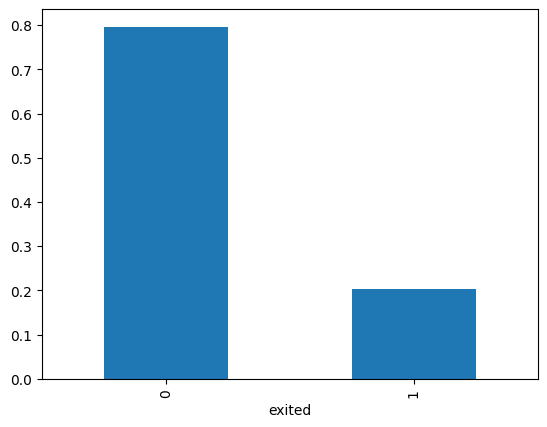

In [38]:
target_counts = target.value_counts(normalize=True)
print(target_counts)


target_counts.plot(kind='bar')

Doing the sanity check that is target_counts helps to understood the customers who has exited the company and who has not. It is known that the customers who exited the company is lower than the one who hasn't. This helps one to know the imbalance in the data. 

In [41]:
target_pred_constant = pd.Series(0, index=target.index)
print(accuracy_score(target,target_pred_constant))

target_pred_constant = pd.Series(1, index=target.index)
print(accuracy_score(target,target_pred_constant))

0.7963
0.2037


To improve the quality of the model for this project, there is a need to use atleast two techniques. For this, first I used hyperparameter "'class_weight' = balanced" and second used upsampling data. 

#### Improve the quality of the model

In [42]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=57
    )
    offset = len(target_upsampled[target_upsampled==1]) - len(target_upsampled[target_upsampled==0])
    
    features_upsampled = pd.concat([features_upsampled, features_zeros.head(offset)])
    target_upsampled = pd.concat([target_upsampled, target_zeros.head(offset)])
    

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)

exited
1    4932
0    4932
Name: count, dtype: int64


<Axes: xlabel='exited'>

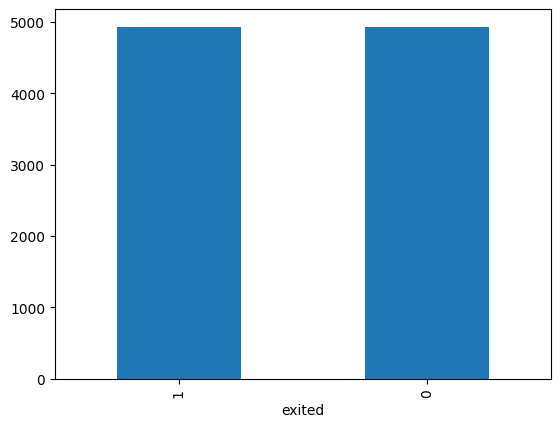

In [43]:
target_upsampled_counts = target_upsampled.value_counts()
print(target_upsampled_counts)

target_upsampled_counts.plot(kind='bar')

In [44]:
best_score = 0
best_est = 0
best_depth = 0
best_model = None

for est in range(1,21):
    for depth in range(1,11):
        model = RandomForestClassifier(random_state=57, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if f1 > best_score:
            best_score = f1
            best_est = est
            best_depth = depth
            best_model = model
        
print("Accuracy of the best model on the validation set (n_estimators = {}, max_depth = {}): {}".format(best_est, best_score, best_depth))

print("Precision:", precision_score(target_valid, predicted_valid))
print("Recall:", recall_score(target_valid, predicted_valid))
print('F1_21:', f1_score(target_valid, predicted_valid))
print('ROC_AUC:', roc_auc_score(target_valid, probabilities_one_valid))

Accuracy of the best model on the validation set (n_estimators = 16, max_depth = 0.6288888888888889): 9
Precision: 0.5608247422680412
Recall: 0.6851385390428212
F1_21: 0.6167800453514739
ROC_AUC: 0.854610608886675


For this model, to improve the quality upsampling data was done. After using the code to upsample the data, target_counts was done. Doing this, it can be seen that upsampling data have successfully balanced the data. Now the model was used for upsampled data and thus the F1 score is 0.616780045351474 which is also higher than expected F1 score (0.59) and ROC_AUC score is 0.854610608886675.

In [45]:
best_score = 0
best_est = 0
best_depth = 0
best_model = None

for est in range(1,21):
    for depth in range(1,11):
        model = RandomForestClassifier(random_state=57, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if f1 > best_score:
            best_score = f1
            best_est = est
            best_depth = depth
            best_model = model
        
print("Accuracy of the best model on the validation set (n_estimators = {}, max_depth = {}): {}".format(best_est, best_score, best_depth))

print("Precision:", precision_score(target_valid, predicted_valid))
print("Recall:", recall_score(target_valid, predicted_valid))
print('F1_21:', f1_score(target_valid, predicted_valid))
print('ROC_AUC:', roc_auc_score(target_valid, probabilities_one_valid))

Accuracy of the best model on the validation set (n_estimators = 17, max_depth = 0.624): 8
Precision: 0.5980392156862745
Recall: 0.6146095717884131
F1_21: 0.6062111801242236
ROC_AUC: 0.8492868378088314


After using the hyperparameter 'class_weight = balanced' to improve the quality, the F1 score improved and is 0.6222760290556901 which is higher than the expected F1 value (0.59)  while ROC_AUC score is 0.8537746448331293. 

In [46]:
test_accuracy = best_model.score(features_test, target_test) 

predicted_test = best_model.predict(features_test)
probabilities_valid =best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('F1:', f1_score(target_test, predicted_test))
print('ROC_AUC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.6097297297297297
ROC_AUC: 0.8557907009998571


Test set accuracy of the best model using upsampling data to improve the quality is 0.5990338164251209 which is close to the accuracy of the validation sets (0.6222760290556901). This shows that the model is performing well and it generalizes effectively to new data. Slight drop in accuracy from validation set to test set is normal which suggests that the model is not overfitting. While the ROC_AUC score for the best model is 0.8537746448331293 which is similar to the ROC_AUC score for the test set is 0.8544189028443205, shows that the model can effectively rank predictions for the positive and negative classes across a wide range of thresholds. 

## Overall Conclusion

The project is to build a model the maximum possible F1 score to predict whether a customer will leave the bank soon using the data on clients’ past behavior and termination of contracts with the bank. For this to improve the quality of the model to increase the F1 score, hyperparameters tuning was does along with adding a hyperparameter 'class_weight' for one model and upsampling data for another model which resulted in increasing the F1 score. For both models to improve the quality of the model, both F1 score and AUC-ROC score are relatively close, indicating the models are performing similarly across precision-recall and classification threshold analyses.

Test set accuracy of the best model using upsampling data to improve the quality is 0.5990338164251209 which is close to the accuracy of the validation sets (0.6222760290556901). This shows that the model is performing well and it generalizes effectively to new data. Slight drop in accuracy from validation set to test set is normal which suggests that the model is not overfitting. While the ROC_AUC score for the best model is 0.8537746448331293 which is similar to the ROC_AUC score for the test set is 0.8544189028443205, shows that the model can effectively rank predictions for the positive and negative classes across a wide range of thresholds.